# Hard Margin Case

#### 3. Plot the dataset with the labels.
Below, the data is labeled and graphed accordingly, subdivided into positive (red) and negative  (blue) samples. 

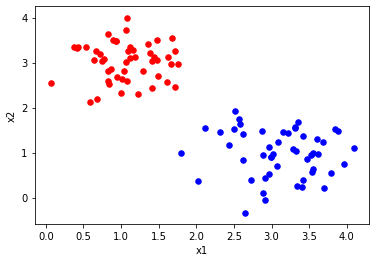

In [59]:
import numpy as np
import csv
from numpy import genfromtxt
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
import cvxopt
%matplotlib inline

# SVM explanation:
# https://medium.com/@zachary.bedell/support-vector-machines-explained-73f4ec363f13

# Use numpy function genfromtxt(…, delimiter=…) to load from files.

# Store the data from “X.csv” to X and target from “y.csv” to y
# print(X)
X = genfromtxt('X.csv',delimiter = ',')
y = genfromtxt('y.csv',delimiter = ',')
# print(X)
# Use np.where to find all index of data which y=1 and store them to idx_1
idx_1 = np.where( y == 1)
# print(idx_1)
# same as y=-1, store them to idx_2
idx_2 = np.where(y == -1)
# print(idx_2)
# make the plot use plt.scatter(X[idx_1,0], X[idx_1,1], s=30, c='b', marker="o")
def plot_data(X,y,idx_1,idx_2):
  plt.scatter(X[idx_1,0], X[idx_1,1], s=30, c='b', marker="o")
  plt.scatter(X[idx_2,0],X[idx_2,1],s=30,c='r',marker = "o")
  plt.xlabel("x1")
  plt.ylabel("x2")

plot_data(X,y,idx_1,idx_2)
# Set the x label with x1 and y label with x2

# plt.show()


###4.Compute the SVM primal problem and return the weights
Using the cvxopt library, the primal problem for the SVM Hard Margin Case will be solved by returning the optimal weights values. Such weights will be used to calculate the decision boundary and the optimized margin

In [60]:

def linear_svm(X,y):
    solvers.options['show_progress'] = False
#     store the shape of X to two variables: N,F
    N,F = X.shape

#     create the Identity matrix using np.diag and np.ones
    I = np.identity(F)     

#     create the Q matrix using np.zeros
    Q = np.zeros((F+1,F+1))
   
    stop = 1
    for row in range (F+1):
      for column in range(F+1):
        if stop:
          # when row number is 0, set Q[row, col]=0
          if row == 0:
            Q[row,column]=0
          #when col number is 0 set Q[row,col]=0
          elif column == 0:
            Q[row,column]=0
          # else, compute Identity [row-1,col-1] and set it to Q[row,col]
          else:
            id_shape = Q[row:,column:].shape
            identity = np.zeros(id_shape)
            np.fill_diagonal(identity,1)
            Q[row:,column:] = identity
            stop = 0
    
    # use cvxopt.matrix to create a new variable p with value Q
    P = cvxopt.matrix(Q)
    
    # use cvxopt.matrix to create a new variable q with value np.zeros(F+1)
    q = cvxopt.matrix(np.zeros(F+1))

    # create an empty list
    e_list = []

    for n in range(N):
      # create a zero matric with size F+1
      z_matrix = np.zeros(F+1)
      # for each element in the matric above:
      for element in range(F+1):
        # when the index=0, then set it to 1
        if element == 0:
          z_matrix[element] = 1
        #  else, set the value to X[n].T[i-1]
        else:
          z_matrix[element] = X[n].T[element-1]
      #  append the y[n]*updated matric to the empty list above (the one above the for loop
      e_list.append(y[n]*z_matrix)   
    # change the empty list to the np array and times -1
    e_list = -1 * np.array(e_list)

    # use cvxopt.matrix to convert above np array and store it in a variable: G
    G = cvxopt.matrix(e_list)
    # create a variable named h with value np.ones(N)*-1 and convert it to cvxopt
    h = cvxopt.matrix(np.ones(N)*-1)
    # solve the primal using cvxopt.solvers.qp
    primal = cvxopt.solvers.qp(P,q,G,h)
    #  return the answer.
    return primal


# fit svm classifier
solved = linear_svm(X,y)
w = np.array(solved['x'])
print('Weights:\n',w)

Weights:
 [[ 0.46118099]
 [ 1.42189318]
 [-1.58830104]]


### 5. Plotting the  decision boundary
Using the weights, the slope and the y_intercept of the decision boundary is calculated.

In [0]:
def plot_decision_boundary(w):
  # Decision boundary equation:  w^T x + b = 0
  
  #     find the slope of the decision boundary
  slope = - w[1] / w[2]
  #     find the intercept.
  y_intercept = -w[0] / w[2]
  #     generate several x values np.arrange()
  x_values = np.arange(0, 6)
  #     calculate its y values using intercept and slope
  y_values= x_values * slope + y_intercept
  #     plot a line
  plt.plot(x_values,y_values,c="black")

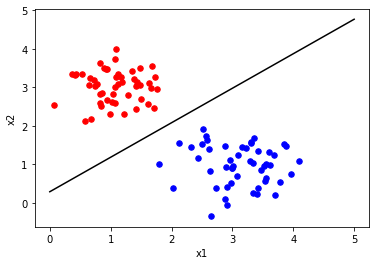

In [62]:
def plot_data_with_decision_boundary(X, y, w, fig_size=(15, 9), labels=['x1', 'x2']):
  # plot the dataset
  plot_data(X,y,idx_1,idx_2)
  # plot the decision boundary
  plot_decision_boundary(w)


  

# plotting the points and decision boundary using the above function   

plot_data_with_decision_boundary(X,y,w)


### 6. Using the decision boundary formula, the distances of all the points from the decision boundary is calculated.    

In [63]:
# calculate distance from each point to the decision boundary

w0 = w[0]
w1 = w[1]
w2 = w[2]
wmagnitudesquared= (w1**2)+(w2**2)
w_array = []
w_array.append(w1)
w_array.append(w2)
w_array = np.array(w_array)
r_values= []
for point in X:
  r = (w_array.T.dot(point.reshape(2,1)) + w0)/wmagnitudesquared
  r_values.append(r.tolist()[0][0])
r_values = np.abs(r_values)
id_smallest = np.argpartition(r_values,3)[:3]
margin = 2/((wmagnitudesquared)**(1/2))
print("Margin:",margin[0])
print("Points closes to decision boundary: ")
print("Points Idx: ",id_smallest)
print("Points: ")
print(X[id_smallest[0]])
print(X[id_smallest[1]])
print(X[id_smallest[2]])


Margin: 0.9381836869408985
Points closes to decision boundary: 
Points Idx:  [68 49 25]
Points: 
[1.71138733 2.45204836]
[2.51879639 1.91565724]
[2.11457352 1.5537852 ]


### 7-8: Write the decision function $f_{\texttt{primal}}({\bf x})$ to predict examples.  Use this function to predict the label of $(3.0, 1.5)^T$ and $(1.2, 3.0)^T$
Using the decision boundary formula, the y value from the points is calculated and if it is 1 or -1 the data point will be labeled as positive(red) and negative(blue). 

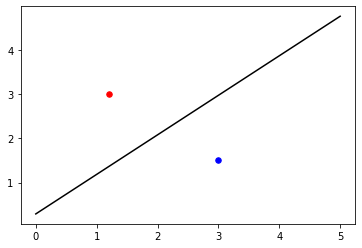

In [64]:
# using f_ primal() to predict (3.0, 1.5) and (1.2, 3.0) and plot the figure.
def f_primal(x):
  x = np.array(x)

  y = w_array.T.dot(x.reshape(2,1))+w0
  if (y >= 1):
    return 'b'
  else:
    return 'r'

point_1 = [3.0,1.5]
point_2 = [1.2,3.0]
label_p1 = f_primal(point_1)
label_p2 = f_primal(point_2)
plot_decision_boundary(w)
plt.scatter(point_1[0], point_1[1], s=30, c=label_p1, marker="o")
plt.scatter(point_2[0], point_2[1], s=30, c=label_p2, marker="o")





Some resources that helped me understand SVMs:
- Yi Fang Slides

- https://goelhardik.github.io/2016/11/28/svm-cvxopt/
- https://xavierbourretsicotte.github.io/SVM_implementation.html
- http://www.robots.ox.ac.uk/~cvrgbennett00duality.pdf https://pythonprogramming.net/soft-margin-kernel-cvxopt-svm-machine-learning-tutorial/ 
- https://towardsdatascience.com/support-vector-machines-for-classification-fc7c1565e3
-https://cmci.colorado.edu/classes/INFO-4604/files/notes_svm.pdf

